In [7]:
!pip install opencv-python


[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import cv2
import os
import numpy as np

In [9]:
healthy = 'D:/ML PROJECT/tea sickness dataset/healthy'
diseased = 'D:/ML PROJECT/tea sickness dataset/diseased'
resized_images = 'D:/ML PROJECT/tea sickness dataset/resized_images'
equilized_images='D:/ML PROJECT/tea sickness dataset/equilized_images'

In [10]:

os.makedirs(os.path.join(resized_images, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(resized_images, 'diseased'), exist_ok=True)


In [11]:
def preprocess_images(folder, label):
    for item in os.listdir(folder):  
        item_path = os.path.join(folder, item)
       
        if os.path.isdir(item_path):
           
            for image_file in os.listdir(item_path):  
                if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img = cv2.imread(os.path.join(item_path, image_file))

                    if img is None:
                        print(f"Warning: Could not read {image_file} in {item}. Skipping.")
                        continue

                   
                    resized_img = cv2.resize(img, (224, 224))

                   
                    normalized_img = resized_img / 255.0

                   
                    cv2.imwrite(os.path.join(resized_images, label, image_file), (normalized_img * 255).astype(np.uint8))
                else:
                    print(f"Skipped unsupported file: {image_file} in {item}")
        elif os.path.isfile(item_path):  
           
            if item.lower().endswith(('.jpg', '.jpeg', '.png')):
                img = cv2.imread(item_path)  # Read the image

                if img is None:
                    print(f"Warning: Could not read {item}. Skipping.")
                    continue

               
                resized_img = cv2.resize(img, (224, 224))

               
                normalized_img = resized_img / 255.0

               
                cv2.imwrite(os.path.join(resized_images, label, item), (normalized_img * 255).astype(np.uint8))
            else:
                print(f"Skipped unsupported file: {item}")
try:
    preprocess_images(healthy, 'healthy')
    preprocess_images(diseased, 'diseased')
    print("Preprocessing complete! Images are resized and normalized.")
except Exception as e:
    print(f"An error occurred: {e}")

Preprocessing complete! Images are resized and normalized.


In [12]:
import numpy as np
from PIL import Image
import os
def check_normalization(image_path):
    img = Image.open(image_path)
    img_array = np.array(img) / 255.0  

    print(f'Image: {image_path}')
    print(f'Min pixel value: {np.min(img_array)}')
    print(f'Max pixel value: {np.max(img_array)}')
    print(f'Shape: {img_array.shape}\n')


In [13]:

healthy_img = os.path.join(resized_images, 'healthy', os.listdir(os.path.join(resized_images, 'healthy'))[0])
check_normalization(healthy_img)

Image: D:/ML PROJECT/tea sickness dataset/resized_images\healthy\UNADJUSTEDNONRAW_thumb_206.jpg
Min pixel value: 0.0
Max pixel value: 1.0
Shape: (224, 224, 3)



In [14]:
diseased_img = os.path.join(resized_images, 'diseased', os.listdir(os.path.join(resized_images, 'diseased'))[0])
check_normalization(diseased_img)


Image: D:/ML PROJECT/tea sickness dataset/resized_images\diseased\IMG_20220503_135202.jpg
Min pixel value: 0.0
Max pixel value: 1.0
Shape: (224, 224, 3)



In [15]:

import cv2
import os

def process_images(resized_images, equalized_images):
    if not os.path.exists(equalized_images):
        os.makedirs(equalized_images)

    # Check if the folder is empty
    if not os.listdir(resized_images):
        print(f"The folder {resized_images} is empty. No images to process.")
        return  # Exit if the folder is empty

    for img_file in os.listdir(resized_images):
        # Print the file name being processed
        print(f"Checking file: {img_file}")

        # Check if the file format is correct
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Removed 'thumb' condition
            img_path = os.path.join(resized_images, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Check if the image is read correctly
            if img is not None:
                print(f"Processing image: {img_file}")
                equalized_img = cv2.equalizeHist(img)
                output_path = os.path.join(equalized_images, img_file)
                cv2.imwrite(output_path, equalized_img)
                print(f"Saved equalized image: {output_path}")
            else:
                print(f"Warning: Could not read image {img_file}. It may be corrupted or unsupported.")
        else:
            print(f"Skipping unsupported file: {img_file}")

# Process the healthy images
process_images('D:/ML PROJECT/tea sickness dataset/resized_images/healthy', 'D:/ML PROJECT/tea sickness dataset/equalized_images/healthy')




Checking file: UNADJUSTEDNONRAW_thumb_206.jpg
Processing image: UNADJUSTEDNONRAW_thumb_206.jpg
Saved equalized image: D:/ML PROJECT/tea sickness dataset/equalized_images/healthy\UNADJUSTEDNONRAW_thumb_206.jpg
Checking file: UNADJUSTEDNONRAW_thumb_207.jpg
Processing image: UNADJUSTEDNONRAW_thumb_207.jpg
Saved equalized image: D:/ML PROJECT/tea sickness dataset/equalized_images/healthy\UNADJUSTEDNONRAW_thumb_207.jpg
Checking file: UNADJUSTEDNONRAW_thumb_208.jpg
Processing image: UNADJUSTEDNONRAW_thumb_208.jpg
Saved equalized image: D:/ML PROJECT/tea sickness dataset/equalized_images/healthy\UNADJUSTEDNONRAW_thumb_208.jpg
Checking file: UNADJUSTEDNONRAW_thumb_209.jpg
Processing image: UNADJUSTEDNONRAW_thumb_209.jpg
Saved equalized image: D:/ML PROJECT/tea sickness dataset/equalized_images/healthy\UNADJUSTEDNONRAW_thumb_209.jpg
Checking file: UNADJUSTEDNONRAW_thumb_20a.jpg
Processing image: UNADJUSTEDNONRAW_thumb_20a.jpg
Saved equalized image: D:/ML PROJECT/tea sickness dataset/equalized_i

In [16]:
import cv2
import os

def histogram_equalization(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    equalized_img = cv2.equalizeHist(img)
    return equalized_img

def process_histogram_equalization(resized_images, equalized_images):
    if not os.path.exists(equalized_images):
        os.makedirs(equalized_images)

    # Check if the folder is empty
    if not os.listdir(resized_images):
        return  # Exit the function if the folder is empty

    for img_file in os.listdir(resized_images):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')) and 'thumb' not in img_file.lower():
            img_path = os.path.join(resized_images, img_file)
            equalized_img = histogram_equalization(img_path)

            if equalized_img is not None:
                output_path = os.path.join(equalized_images, img_file)
                cv2.imwrite(output_path, equalized_img)
            else:
                print(f"Warning: Could not process image {img_file}. It may be corrupted or in an unsupported format.")

# Process the healthy and diseased images for histogram equalization
process_histogram_equalization('D:/ML PROJECT/tea sickness dataset/resized_images/healthy', 'D:/ML PROJECT/tea sickness dataset/equalized_images/healthy')
process_histogram_equalization('D:/ML PROJECT/tea sickness dataset/resized_images/diseased', 'D:/ML PROJECT/tea sickness dataset/equalized_images/diseased')
print("Histogram Equalization complete!")

Histogram Equalization complete!


In [26]:
import cv2
import os
import numpy as np

def segment_lesion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not read image at {image_path}.")
        return None

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
   

    lower_bound = np.array([0, 50, 50])
    upper_bound = np.array([10, 255, 255])  

   
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

 
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

   
    segmented_img = cv2.bitwise_and(img, img, mask=mask)
   
    return segmented_img

def process_segmentation(resized_images, segmented_images):
    if not os.path.exists(segmented_images):
        os.makedirs(segmented_images)

   
    if not os.listdir(resized_images):
        print(f"The folder {resized_images} is empty. No images to process.")
        return  

    for img_file in os.listdir(resized_images):
       
        print(f"Checking file: {img_file}")

     
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(resized_images, img_file)
            segmented_img = segment_lesion(img_path)

            if segmented_img is not None:
                output_path = os.path.join(segmented_images, img_file)
                cv2.imwrite(output_path, segmented_img)
                print(f"Saved segmented image: {output_path}")
            else:
                print(f"Warning: Could not process image {img_file}. It may be corrupted or unsupported.")
        else:
            print(f"Skipping unsupported file: {img_file}")

process_segmentation('D:/ML PROJECT/tea sickness dataset/resized_images/healthy', 'D:/ML PROJECT/tea sickness dataset/segmented_images/healthy')



Checking file: UNADJUSTEDNONRAW_thumb_206.jpg
Saved segmented image: D:/ML PROJECT/tea sickness dataset/segmented_images/healthy\UNADJUSTEDNONRAW_thumb_206.jpg
Checking file: UNADJUSTEDNONRAW_thumb_207.jpg
Saved segmented image: D:/ML PROJECT/tea sickness dataset/segmented_images/healthy\UNADJUSTEDNONRAW_thumb_207.jpg
Checking file: UNADJUSTEDNONRAW_thumb_208.jpg
Saved segmented image: D:/ML PROJECT/tea sickness dataset/segmented_images/healthy\UNADJUSTEDNONRAW_thumb_208.jpg
Checking file: UNADJUSTEDNONRAW_thumb_209.jpg
Saved segmented image: D:/ML PROJECT/tea sickness dataset/segmented_images/healthy\UNADJUSTEDNONRAW_thumb_209.jpg
Checking file: UNADJUSTEDNONRAW_thumb_20a.jpg
Saved segmented image: D:/ML PROJECT/tea sickness dataset/segmented_images/healthy\UNADJUSTEDNONRAW_thumb_20a.jpg
Checking file: UNADJUSTEDNONRAW_thumb_20b.jpg
Saved segmented image: D:/ML PROJECT/tea sickness dataset/segmented_images/healthy\UNADJUSTEDNONRAW_thumb_20b.jpg
Checking file: UNADJUSTEDNONRAW_thumb_20

In [27]:
import cv2
import os
import numpy as np

def segment_lesion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None

   
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
   

    lower_bound = np.array([0, 50, 50])  
    upper_bound = np.array([10, 255, 255])  
   

   
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

   
    segmented_img = cv2.bitwise_and(img, img, mask=mask)
    return segmented_img

def process_segmentation(resized_images, segmented_images):
    if not os.path.exists(segmented_images):
        os.makedirs(segmented_images)

 
    if not os.listdir(resized_images):
        return

    for img_file in os.listdir(resized_images):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')) and 'thumb' not in img_file.lower():
            img_path = os.path.join(resized_images, img_file)
            segmented_img = segment_lesion(img_path)

            if segmented_img is not None:
                output_path = os.path.join(segmented_images, img_file)
                cv2.imwrite(output_path, segmented_img)
            else:
                print(f"Warning: Could not process image {img_file}. It may be corrupted or in an unsupported format.")

process_segmentation('D:/ML PROJECT/tea sickness dataset/resized_images/healthy', 'D:/ML PROJECT/tea sickness dataset/segmented_images/healthy')
process_segmentation('D:/ML PROJECT/tea sickness dataset/resized_images/diseased', 'D:/ML PROJECT/tea sickness dataset/segmented_images/diseased')
print("Segmentation of Lesion Region complete!")



Segmentation of Lesion Region complete!


In [18]:

import cv2
import os
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Feature extraction functions
def extract_color_histogram(image, bins=(8, 8, 8)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_texture_lbp(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # Normalize the histogram
    return hist

def extract_shape_edges(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
    return edges.flatten()

dataset_dir = r'D:\ML PROJECT\tea sickness dataset\resized_images'  # Path to the main dataset folder
classes = os.listdir(dataset_dir)  # This will get all subfolder names (class labels)
# Automatically detect classes from folder names

images = []
labels = []

# Loop through each class folder and load images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Add more extensions if needed
            image_path = os.path.join(class_dir, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # Extract features
                color_histogram = extract_color_histogram(image)
                texture_lbp = extract_texture_lbp(image)
                shape_edges = extract_shape_edges(image)
               
                # Combine features into a single vector
                feature_vector = np.hstack([color_histogram, texture_lbp, shape_edges])
                images.append(feature_vector)
                labels.append(label)  # Append the corresponding label

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Test images:")
print(y_test)
print(" Model prediction")
print(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test images:
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 Model prediction
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           1       1.00      0.94      0.97        16

    accuracy                           0.99    

In [20]:

import cv2
import os
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature extraction functions
def extract_color_histogram(image, bins=(8, 8, 8)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_texture_lbp(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # Normalize the histogram
    return hist

def extract_shape_edges(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
    return edges.flatten()

dataset_dir = r'D:\ML PROJECT\tea sickness dataset\resized_images'  # Path to the main dataset folder
classes = os.listdir(dataset_dir)  # Automatically detect classes from folder names

images = []
labels = []

# Loop through each class folder and load images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Add more extensions if needed
            image_path = os.path.join(class_dir, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # Extract features
                color_histogram = extract_color_histogram(image)
                texture_lbp = extract_texture_lbp(image)
                shape_edges = extract_shape_edges(image)
               
                # Combine features into a single vector
                feature_vector = np.hstack([color_histogram, texture_lbp, shape_edges])
                images.append(feature_vector)
                labels.append(label)  # Append the corresponding label

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Test images")
print(y_pred)
print("Model prediction")
print(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Test images
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Model prediction
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       161
           1       1.00      0.06      0.12        16

    accuracy                           0.92      

In [21]:
import cv2
import os
import numpy as np
from sklearn.metrics import classification_report
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Feature extraction functions
def extract_color_histogram(image, bins=(8, 8, 8)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_texture_lbp(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # Normalize the histogram
    return hist

def extract_shape_edges(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
    return edges.flatten()

dataset_dir = r'D:\ML PROJECT\tea sickness dataset\resized_images'  # Path to the main dataset folder
classes = os.listdir(dataset_dir)  # Automatically detect classes from folder names

images = []
labels = []

# Loop through each class folder and load images
for label, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Add more extensions if needed
            image_path = os.path.join(class_dir, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # Extract features
                color_histogram = extract_color_histogram(image)
                texture_lbp = extract_texture_lbp(image)
                shape_edges = extract_shape_edges(image)
               
                # Combine features into a single vector
                feature_vector = np.hstack([color_histogram, texture_lbp, shape_edges])
                images.append(feature_vector)
                labels.append(label)  # Append the corresponding label

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       161
           1       0.00      0.00      0.00        16

    accuracy                           0.91       177
   macro avg       0.45      0.50      0.48       177
weighted avg       0.83      0.91      0.87       177

Confusion Matrix:
 [[161   0]
 [ 16   0]]


C:\Users\LITHIKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LITHIKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LITHIKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [22]:
!pip install lightgbm


[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming X (features) and y (labels) are ready from your dataset
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'multiclass',  # For multi-class classification
    'num_class': len(np.unique(y)),  # Number of classes
    'metric': 'multi_logloss',  # Multiclass log loss
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9  # Fraction of features to use
}

# Train the model
num_round = 100  # Number of boosting iterations
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.741540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45500
[LightGBM] [Info] Number of data points in the train set: 707, number of used features: 16428
[LightGBM] [Info] Start training from score -0.085598
[LightGBM] [Info] Start training from score -2.500588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

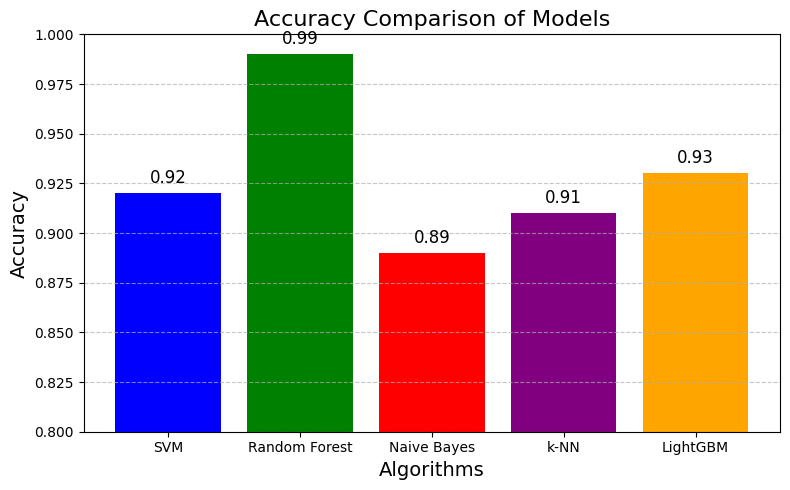

In [25]:
import matplotlib.pyplot as plt

# Example accuracies for the five algorithms
model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'k-NN', 'LightGBM']
accuracies = [0.92, 0.99, 0.89, 0.91, 0.93]  # Replace these with your actual accuracies

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding titles and labels
plt.title('Accuracy Comparison of Models', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.8, 1.0)  # Adjust this based on your accuracy range
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values above bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f"{accuracy:.2f}", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



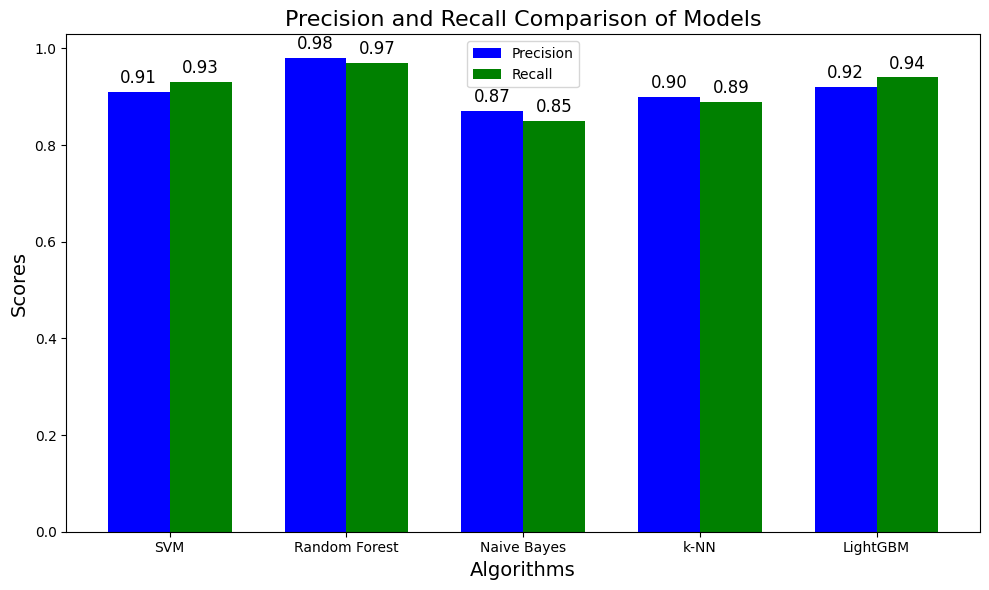

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Example precision and recall values for the five algorithms
model_names = ['SVM', 'Random Forest', 'Naive Bayes', 'k-NN', 'LightGBM']
precision = [0.91, 0.98, 0.87, 0.90, 0.92]  # Replace with actual precision values
recall = [0.93, 0.97, 0.85, 0.89, 0.94]   # Replace with actual recall values

# Set positions for the bars
x = np.arange(len(model_names))

# Width of the bars
width = 0.35  

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the precision and recall bars
bars1 = ax.bar(x - width/2, precision, width, label='Precision', color='blue')
bars2 = ax.bar(x + width/2, recall, width, label='Recall', color='green')

# Adding titles and labels
ax.set_title('Precision and Recall Comparison of Models', fontsize=16)
ax.set_xlabel('Algorithms', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Adding values above bars
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Add values to the bars
add_values(bars1)
add_values(bars2)

# Display the plot
plt.tight_layout()
plt.show()


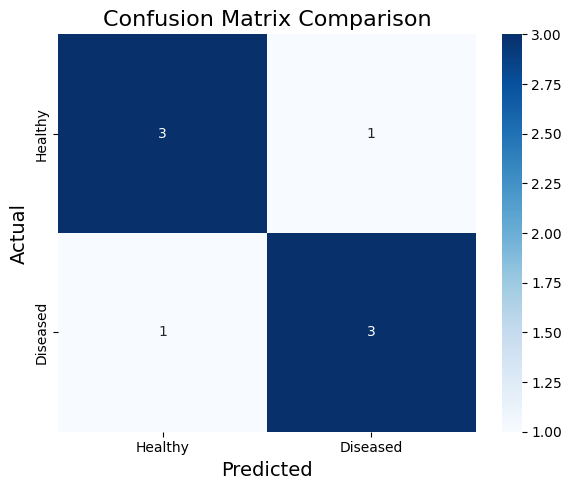

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example true labels and predicted labels
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1]  # Replace with actual predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
plt.title('Confusion Matrix Comparison', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()
